# Real Esatate Data Preparation

## Libraries and settings 

In [61]:
# Import necessary libraries
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Get current working directory
print(os.getcwd())

/workspaces/python_exploratory_data_analysis/datapreparation


## Step 1: Importing Data
Aufgabe 1: Datenimport und Basisinformationen

- Laden Sie die Daten aus der „real_estate_data.xlsx“-Datei in einen DataFrame.
- Ermitteln Sie die Anzahl der Zeilen und Spalten und geben Sie sie aus.
- Zeigen Sie die ersten fünf Zeilen des DataFrames an.

In [62]:
# Load data from Excel into pandas DataFrame
df = pd.read_excel('./Data/real_estate_data.xlsx', sheet_name='properties')

# Anzahl der Zeilen und Spalten
print("Anzahl der Zeilen:", df.shape[0])
print("Anzahl der Spalten:", df.shape[1])

# Display first few rows
df.head()

Anzahl der Zeilen: 15
Anzahl der Spalten: 9


,property_id,location,size_raw,price_raw,rooms_raw,year_built,type,heating_type,description
0,1,Zürich,120 m²,CHF 1'200'000.–,4.5 Zimmer,2000.0,Wohnung,Gas,Schöne und moderne Wohnung in zentraler Lage
1,2,Bern,85 m²,CHF 850'000.–,3 Zimmer,1995.0,Haus,Öl,Geräumiges Haus mit großem Garten
2,3,Genf,150 m²,CHF 1'500'000.–,5 Zimmer,2010.0,Wohnung,Elektro,Exklusive Wohnung mit Seeblick
3,4,Basel,200 m²,CHF 2'300'000.–,6 Zimmer,1980.0,Haus,Gas,Charmantes Haus mit großem Garten und Pool
4,5,Lausanne,95 m²,CHF 920'000.–,3.5 Zimmer,2005.0,Wohnung,Öl,Gemütliche Wohnung in ruhiger Umgebung


## Step 2: Exploratory Data Analysis

In [63]:
# Dimension of data (rows and columns)
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 15
Number of columns: 9


In [64]:
# Data types of each column
df.dtypes

property_id       int64
location         object
size_raw         object
price_raw        object
rooms_raw        object
year_built      float64
type             object
heating_type     object
description      object
dtype: object

## Extraktion numerischer Werte und Behandlung von fehlenden Werten
1. Extrahieren Sie die numerischen Werte aus der Spalte size_raw (z. B. Quadratmeterangabe) und speichern Sie sie als size im DataFrame.
2. Extrahieren Sie die numerischen Werte aus price_raw und speichern Sie sie als price im DataFrame.
3. Extrahieren Sie die Anzahl der Zimmer aus rooms_raw und speichern Sie sie als rooms im DataFrame.

In [65]:
import re

# Extraktion der Größe (size)
size = []
for i in df['size_raw']:
    match = re.findall(r'\d+', i)
    try:
        size.append(int(''.join(match)))
    except:
        size.append(None)
df['size'] = pd.Series(size)

In [66]:
# Extraktion des Preises (price)
price = []
for i in df['price_raw']:
    match = re.findall(r'CHF\s*([\d\']+)\.–', i)
    try:
        price.append(int(match[0].replace("'", "")))
    except:
        price.append(None)
df['price'] = pd.Series(price)

In [67]:
# Extraktion der Zimmeranzahl (rooms)
rooms = []
for i in df['rooms_raw']:
    match = re.findall(r'\d+\.?\d*', i)
    try:
        rooms.append(float(match[0]))
    except:
        rooms.append(None)
df['rooms'] = pd.Series(rooms)

In [68]:
# Überprüfen der Extraktion
df[['size_raw', 'size', 'price_raw', 'price', 'rooms_raw', 'rooms']].head()

,size_raw,size,price_raw,price,rooms_raw,rooms
0,120 m²,120,CHF 1'200'000.–,1200000,4.5 Zimmer,4.5
1,85 m²,85,CHF 850'000.–,850000,3 Zimmer,3.0
2,150 m²,150,CHF 1'500'000.–,1500000,5 Zimmer,5.0
3,200 m²,200,CHF 2'300'000.–,2300000,6 Zimmer,6.0
4,95 m²,95,CHF 920'000.–,920000,3.5 Zimmer,3.5


##### Fehllende Werte

In [69]:
# Zählen fehlender Werte
print("Fehlende Werte pro Spalte:\n", df.isnull().sum())

# Entfernen der Zeilen mit fehlenden Werten
df = df.dropna().reset_index(drop=True)
print("Anzahl der Zeilen nach dem Entfernen der fehlenden Werte:", df.shape[0])

Fehlende Werte pro Spalte:
 property_id     0
location        0
size_raw        0
price_raw       0
rooms_raw       0
year_built      0
type            0
heating_type    0
description     0
size            0
price           0
rooms           0
dtype: int64
Anzahl der Zeilen nach dem Entfernen der fehlenden Werte: 15


### Extracting Numerical Values (e.g., from room strings or area descriptions if needed)

In [70]:
# Example for extracting rooms if they were given as "3.5 Zimmer"
# Here, `rooms` is already numeric, but let's prepare code in case of alphanumeric data
# Convert `rooms` column to numeric (if necessary)
df['rooms'] = pd.to_numeric(df['rooms'], errors='coerce')

In [71]:
# Drop rows with missing values
df = df.dropna().reset_index(drop=True)

In [72]:
# Drop duplicates based on property_id
df = df.drop_duplicates(subset='property_id')

### String Manipulation - Making Description Uppercase

df['description'] = df['description'].str.upper()
df[['description']].head()

### Erstellen von Pivot-Tabellen

1. Erstellen Sie eine Pivot-Tabelle, die den durchschnittlichen Preis (price) und die durchschnittliche Größe (size) für jede Immobilienart (type) zeigt.
2. Formatieren Sie die Ergebnisse auf zwei Dezimalstellen und zeigen Sie die Pivot-Tabelle an.

In [73]:
# Erstellen einer Pivot-Tabelle
pivot_table = pd.pivot_table(df, 
                             index='type', 
                             values={'price': 'mean', 'size': 'mean'}).round(2)

# Formatierung der Werte
pivot_table = pivot_table.applymap(lambda x: f"{x:.2f}")
pivot_table


,price,size
type,,
Haus,1575000.00,142.50
Wohnung,1206666.67,121.67


### Feature Engineering

In [74]:
# Create a new feature 'age_of_property' based on the 'year_built' column
df['age_of_property'] = datetime.now().year - df['year_built']
df[['year_built', 'age_of_property']].head()

,year_built,age_of_property
0,2000.0,24.0
1,1995.0,29.0
2,2010.0,14.0
3,1980.0,44.0
4,2005.0,19.0


In [75]:
# Calculate price per square meter
df['price_per_m2'] = df['price'] / df['size']
df[['price', 'size', 'price_per_m2']].head()

,price,size,price_per_m2
0,1200000,120,10000.000000
1,850000,85,10000.000000
2,1500000,150,10000.000000
3,2300000,200,11500.000000
4,920000,95,9684.210526


### Binning and One-Hot Encoding

In [76]:
# Bin `price_per_m2` into categories
df['price_per_m2_cat'] = pd.cut(df['price_per_m2'], bins=5, labels=['very cheap', 'cheap', 'normal', 'expensive', 'very expensive'])

In [77]:
# Perform One-Hot Encoding on the `heating_type` and `price_per_m2_cat` columns
df = pd.get_dummies(df, columns=['heating_type', 'price_per_m2_cat'], drop_first=False)
df.head()

,property_id,location,size_raw,price_raw,rooms_raw,year_built,type,description,size,price,...,age_of_property,price_per_m2,heating_type_Elektro,heating_type_Gas,heating_type_Öl,price_per_m2_cat_very cheap,price_per_m2_cat_cheap,price_per_m2_cat_normal,price_per_m2_cat_expensive,price_per_m2_cat_very expensive
0,1,Zürich,120 m²,CHF 1'200'000.–,4.5 Zimmer,2000.0,Wohnung,Schöne und moderne Wohnung in zentraler Lage,120,1200000,...,24.0,10000.000000,False,True,False,True,False,False,False,False
1,2,Bern,85 m²,CHF 850'000.–,3 Zimmer,1995.0,Haus,Geräumiges Haus mit großem Garten,85,850000,...,29.0,10000.000000,False,False,True,True,False,False,False,False
2,3,Genf,150 m²,CHF 1'500'000.–,5 Zimmer,2010.0,Wohnung,Exklusive Wohnung mit Seeblick,150,1500000,...,14.0,10000.000000,True,False,False,True,False,False,False,False
3,4,Basel,200 m²,CHF 2'300'000.–,6 Zimmer,1980.0,Haus,Charmantes Haus mit großem Garten und Pool,200,2300000,...,44.0,11500.000000,False,True,False,False,False,False,False,True
4,5,Lausanne,95 m²,CHF 920'000.–,3.5 Zimmer,2005.0,Wohnung,Gemütliche Wohnung in ruhiger Umgebung,95,920000,...,19.0,9684.210526,False,False,True,True,False,False,False,False


##### One-Hot Encoding und Skalierung für Immobilientyp

In [78]:
# One-Hot-Encoding für Immobilientyp
df = pd.get_dummies(df, columns=['type'], drop_first=False)

# Min-Max-Skalierung für die Größe
df['size_scaled_minmax'] = (df['size'] - df['size'].min()) / (df['size'].max() - df['size'].min())
df[['size', 'size_scaled_minmax']].head()


,size,size_scaled_minmax
0,120,0.304348
1,85,0.000000
2,150,0.565217
3,200,1.000000
4,95,0.086957


## Step 4: Scaling and Transformation

### Min-Max Scaling

In [79]:
# Apply Min-Max Scaling to `area` column
df['size_scaled_minmax'] = (df['size'] - df['size'].min()) / (df['size'].max() - df['size'].min())

In [80]:
# Apply Z-score normalization to `age_of_property`
df['age_of_property_zscore'] = (df['age_of_property'] - df['age_of_property'].mean()) / df['age_of_property'].std()

## Step 5: Data Visualization

### Plot Distribution of Prices

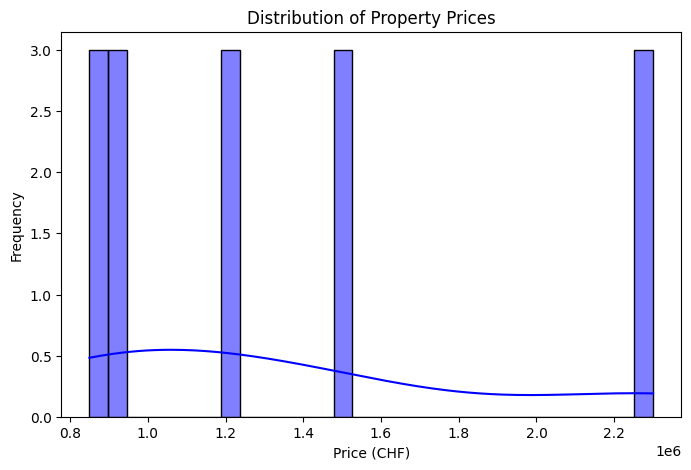

In [81]:
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], bins=30, kde=True, color='blue')
plt.title('Distribution of Property Prices')
plt.xlabel('Price (CHF)')
plt.ylabel('Frequency')
plt.show()

### Box Plot of Price per Square Meter by Property Type

In [82]:
print(df.columns)

Index(['property_id', 'location', 'size_raw', 'price_raw', 'rooms_raw',
       'year_built', 'description', 'size', 'price', 'rooms',
       'age_of_property', 'price_per_m2', 'heating_type_Elektro',
       'heating_type_Gas', 'heating_type_Öl', 'price_per_m2_cat_very cheap',
       'price_per_m2_cat_cheap', 'price_per_m2_cat_normal',
       'price_per_m2_cat_expensive', 'price_per_m2_cat_very expensive',
       'type_Haus', 'type_Wohnung', 'size_scaled_minmax',
       'age_of_property_zscore'],
      dtype='object')


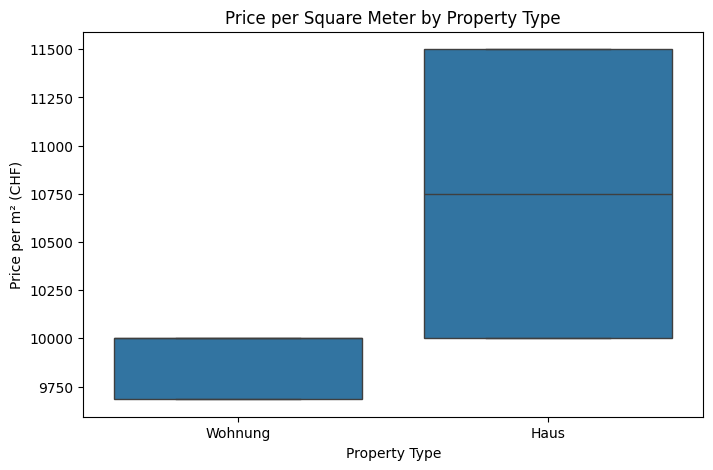

In [83]:
# Erstellen einer neuen Spalte 'type' basierend auf den One-Hot-Encoded-Spalten
df['type'] = df[['type_Haus', 'type_Wohnung']].idxmax(axis=1).str.replace('type_', '')

# Boxplot erstellen
plt.figure(figsize=(8, 5))
sns.boxplot(x='type', y='price_per_m2', data=df)
plt.title('Price per Square Meter by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Price per m² (CHF)')
plt.show()



### Count Plot for Heating Type

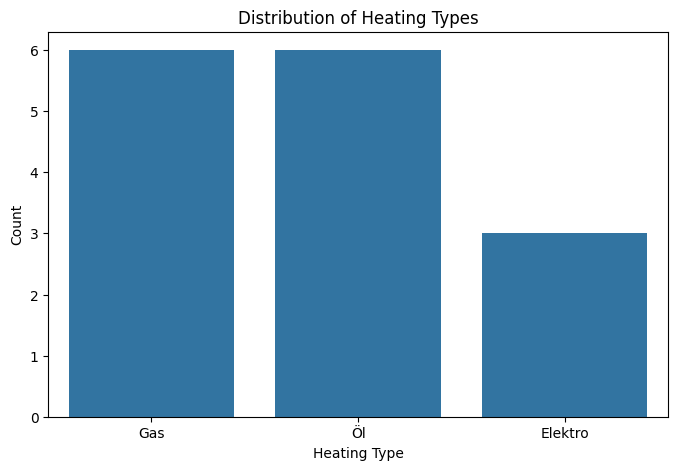

In [84]:
# Erstellen einer neuen Spalte 'heating_type' aus den One-Hot-Encoded-Spalten
df['heating_type'] = df[['heating_type_Elektro', 'heating_type_Gas', 'heating_type_Öl']].idxmax(axis=1).str.replace('heating_type_', '')

# Countplot erstellen
plt.figure(figsize=(8, 5))
sns.countplot(x='heating_type', data=df)
plt.title('Distribution of Heating Types')
plt.xlabel('Heating Type')
plt.ylabel('Count')
plt.show()


## Step 6: Summary Statistics

In [85]:
# Display summary statistics for numerical columns
df.describe()

,property_id,year_built,size,price,rooms,age_of_property,price_per_m2,size_scaled_minmax,age_of_property_zscore
count,15.000000,15.000000,15.000000,1.500000e+01,15.000000,15.000000,15.000000,15.000000,1.500000e+01
mean,8.000000,1995.500000,130.000000,1.354000e+06,4.400000,28.500000,10236.842105,0.391304,4.440892e-17
std,4.472136,6.532884,43.053123,5.442531e+05,1.105183,6.532884,665.891252,0.374375,1.000000e+00
min,1.000000,1980.000000,85.000000,8.500000e+05,3.000000,14.000000,9684.210526,0.000000,-2.219540e+00
25%,4.500000,1993.250000,95.000000,9.200000e+05,3.500000,27.750000,10000.000000,0.086957,-1.148038e-01
50%,8.000000,1995.000000,120.000000,1.200000e+06,4.500000,29.000000,10000.000000,0.304348,7.653588e-02
75%,11.500000,1996.250000,150.000000,1.500000e+06,5.000000,30.750000,10000.000000,0.565217,3.444114e-01
max,15.000000,2010.000000,200.000000,2.300000e+06,6.000000,44.000000,11500.000000,1.000000,2.372612e+00


In [86]:
# Display skewness of numerical columns
df[['price', 'size', 'age_of_property']].skew()

price              0.975858
size               0.669238
age_of_property   -0.052100
dtype: float64

In [87]:
# Zusammenfassende Statistik
summary = df.describe().round(2)
print(summary)

# Schiefe (Skewness) berechnen
skewness = df[['size', 'price', 'rooms']].skew().round(2)
print("Schiefe der Verteilungen:\n", skewness)

       property_id  year_built    size       price  rooms  age_of_property  \
count        15.00       15.00   15.00       15.00  15.00            15.00   
mean          8.00     1995.50  130.00  1354000.00   4.40            28.50   
std           4.47        6.53   43.05   544253.09   1.11             6.53   
min           1.00     1980.00   85.00   850000.00   3.00            14.00   
25%           4.50     1993.25   95.00   920000.00   3.50            27.75   
50%           8.00     1995.00  120.00  1200000.00   4.50            29.00   
75%          11.50     1996.25  150.00  1500000.00   5.00            30.75   
max          15.00     2010.00  200.00  2300000.00   6.00            44.00   

       price_per_m2  size_scaled_minmax  age_of_property_zscore  
count         15.00               15.00                   15.00  
mean       10236.84                0.39                    0.00  
std          665.89                0.37                    1.00  
min         9684.21              

THE END